SIP MINI-PROJECT: Image Enchancement of Hazy Images.


Himanish Goel - I028

Divya Athalye - I027

Applying Dehazing: 

Steps:

1) Converted rgb image to hsv format (hue,saturation,value).
2) extracted v channel and and applied adaptive histogram equalizaton with intensty cap of 2 and the equlized "sub-grids" in a 8x8 matrix.
3) later the processed v channel is attached right back into the original image. alongside increasing saturation in the s band.
4) the image is then converted back to rgb to apply gamma correction
5) here we are taking the gamma value of 1.2.
6) to apply gamma correction first we create an empty array of 256 size
7) we then put the respective intensity value i in the array and change it with respect to our selected gamma threshold of 1.2.
8) we get an "instruction" array to change the intensity values in the original image
9) cv2.LUT is the fuction used to apply this change, where it goes throguh each and every pixel and changes the value by taking it as an index for the "instruction" array and then change it to the value present at that index.  


what effectively happens between the two methods is, first we blance out the intensity values using adaptive hist. equalization where it lowers the high intensity (often white) pixels and "brings up" (makes more apprant) the darker values. which deal with the first problem faced with dehazing where we deal with the excess high intensity values.

the second part of gamma correction make the image  darker wrt to the gamma value to deal with the potential infromation loss in previous step and provide futher enchancement. 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

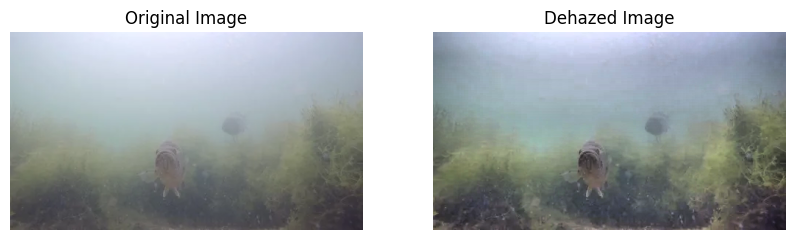

In [2]:
satisfied="N"

# Load the image
image_path = r"C:\Users\himan\OneDrive\Desktop\Underwater_1.webp"  
image = cv2.imread(image_path)

# Apply Gamma Correction
def gamma_trans(img, gamma):
    gamma_table=[np.power(x/255.0,gamma)*255.0 for x in range(256)]
    gamma_table=np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img,gamma_table)

def dehazing(image, grid, limit, sat):

    global image_dehazed
    # Convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Separate the V channel
    v_channel = image_hsv[:, :, 2]

    #Seperate S channel
    s_channel = image_hsv[:, :, 1]

    #apply saturation enhancement
    s_enhanced = cv2.addWeighted(s_channel, 1.5, np.zeros_like(s_channel), 0, 0)

    # Apply Adaptive Histogram Equalization to the V channel
    clahe = cv2.createCLAHE(clipLimit=limit, tileGridSize=(grid,grid))
    v_channel_eq = clahe.apply(v_channel)

    # Replace the V channel in the HSV image
    image_hsv[:, :, 2] = v_channel_eq

    if sat in "Yy":
        image_hsv[:, :, 1] = s_enhanced

    # Convert back to RGB
    image_dehazed = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

    gamma_trans(image_dehazed,1.2)

    return image_dehazed

while satisfied in "Nn":

    grid=int(input("enter grid size"))
    limit=int(input("enter limit, enter 2 for default"))
    sat=(input("enhanced saturation or not? Y/N"))

    dehazing(image, grid, limit, sat)

    # Display the original and dehazed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_dehazed, cv2.COLOR_BGR2RGB))
    plt.title('Dehazed Image')
    plt.axis('off')

    plt.show()

    satisfied = (input("satisfied? Y/N"))


Applying contrast streaching:

1) We first split the image into BGR format (blue, green, red)
2) we apply contrast streching on each of the color channels
3) we merge the image back and apply gamma correction to darken the image to adjust for extreme brightness

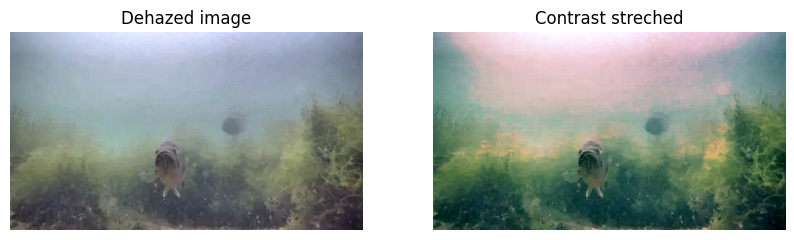

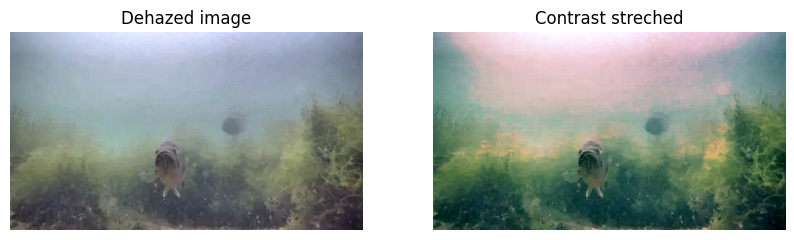

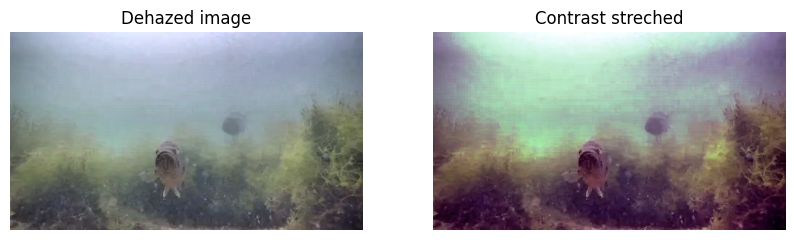

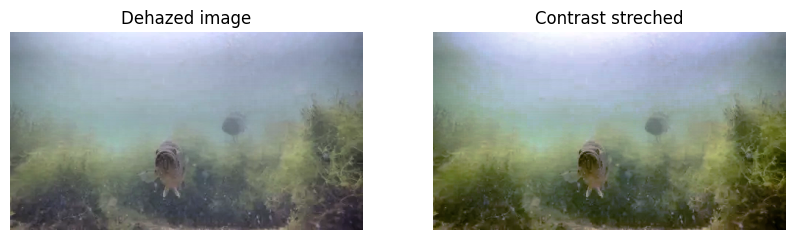

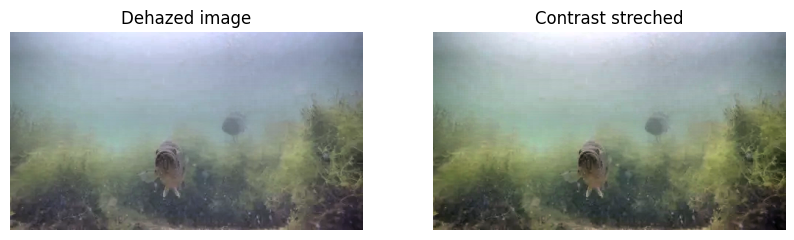

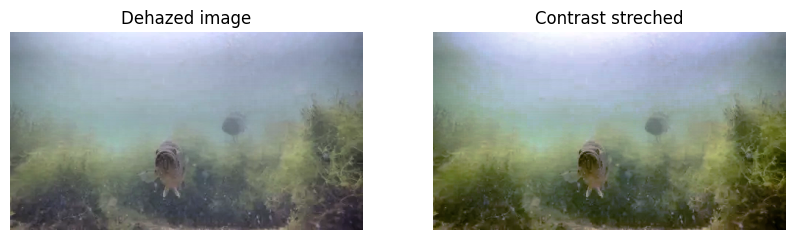

In [3]:
satisfied = "N"

image2 = image_dehazed

def contrast_stretch(image,EquiColor):
    global contrast_stretched_image
    # Split the image into its color channels
    b, g, r = cv2.split(image)

    if "R" in EquiColor:
        r=cv2.equalizeHist(r)
    elif "G" in  EquiColor:
        g=cv2.equalizeHist(g)
    elif "B" in  EquiColor:
        b=cv2.equalizeHist(b)
 

    # Apply contrast stretching to each color channel
    min_intensity_b = np.min(b)
    max_intensity_b = np.max(b)
    min_intensity_g = np.min(g)
    max_intensity_g = np.max(g)
    min_intensity_r = np.min(r)
    max_intensity_r = np.max(r)

    desired_min = 0
    desired_max = 255

    # Perform contrast stretching for each color channel
    b = np.uint8((b - min_intensity_b) / (max_intensity_b - min_intensity_b) * (desired_max - desired_min) + desired_min)
    g = np.uint8((g - min_intensity_g) / (max_intensity_g - min_intensity_g) * (desired_max - desired_min) + desired_min)
    r = np.uint8((r - min_intensity_r) / (max_intensity_r - min_intensity_r) * (desired_max - desired_min) + desired_min)

    # Merge the contrast stretched color channels back into one image
    contrast_stretched_image = cv2.merge((b, g, r))

while satisfied in "Nn":
    EquiColor=input("Apply equalization? (enter disired colour bands (eg: RGB or GB) and press enter for no equaliztion)")

    contrast_stretch(image2,EquiColor)

    plt.figure(figsize=(10, 5), facecolor='white')

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_dehazed, cv2.COLOR_BGR2RGB))
    plt.title('Dehazed image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(contrast_stretched_image, cv2.COLOR_BGR2RGB))
    plt.title('Contrast streched')
    plt.axis('off')

    plt.show()

    satisfied = (input("satisfied? Y/N"))
    

Applying Bilateral Filtering: 

In this step we are just directly applying the bilateral filter to the image

this is taken as to achieve noise reduction to a certain extent and preserve edges to make furthur processing easier to apply

(-0.5, 479.5, 269.5, -0.5)

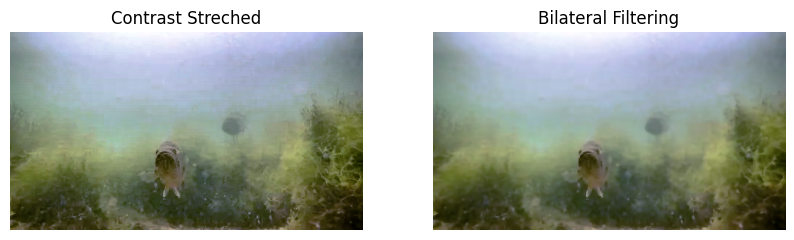

In [4]:
bilateral_image=cv2.bilateralFilter(contrast_stretched_image, 5, 75, 75) 
plt.figure(figsize=(10, 5), facecolor='white')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(contrast_stretched_image, cv2.COLOR_BGR2RGB))
plt.title('Contrast Streched')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filtering')
plt.axis('off')


Applying A standard sharpening mask:

in this step we are applyign a standard sharpening mask and using convolution fuction to apply to each pixel of the image, specifying ddepth as -1 just means that we wanna preserve the depth of the new image wrt the depth of the original image.

this will elp us to define the edges more that were lost in bilateral filtering


(-0.5, 479.5, 269.5, -0.5)

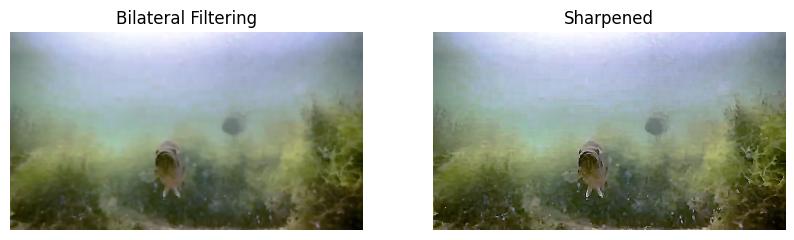

In [5]:
mask =   np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=bilateral_image, ddepth=-1, kernel=mask)


plt.figure(figsize=(10, 5), facecolor='white')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filtering')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB))
plt.title('Sharpened')
plt.axis('off')



Final Comparision:

(-0.5, 479.5, 269.5, -0.5)

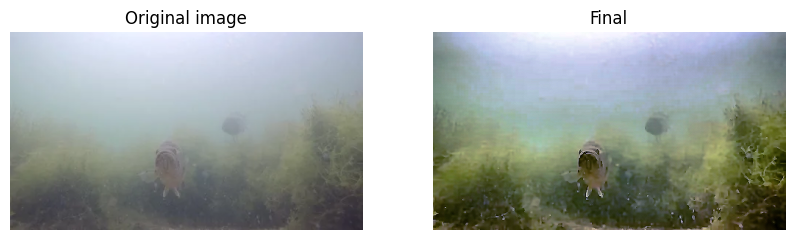

In [6]:
plt.figure(figsize=(10, 5), facecolor='white')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB))
plt.title('Final')
plt.axis('off')